# Convolutional Neural Networks

# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

# Cargar set de Imágenes

In [3]:
dirname = os.path.join(os.getcwd(), '..\\..\\asl_alphabet_train\\asl_alphabet_train')
imgpath = dirname + os.sep 

images = []
prevRoot=''
cant=0
indice=-1
labels=[]
deportes=[]

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            if cant < 50:
                cant += 1
                images.append(plt.imread(os.path.join(root, filename)))
                        
            if prevRoot !=root:
                #cambia directorio
                prevRoot=root
                
                #guarda el nuevo directorio
                name = root.split(os.sep)
                deportes.append(name[len(name)-1])
                   
                #le asigna la etiquetas 
                labels += [indice] * cant
                   
                #log
                print("Etiqueta encontrada: ", name[len(name)-1])
                print("Cantidad etiquetas creadas: ", cant)
                
                indice += 1
                cant=0
                
name = root.split(os.sep)
deportes.append(name[len(name)-1])
    
#le asigna la etiquetas
labels += [indice] * cant

#fix offset
deportes = deportes[:-1]
labels[0] += 1;
    

#log
#print("Etiquetas: ", labels)
#print('Etiquetas leidos:',len(labels))
#print("\r\n");               
#print("Directorios: ", deportes)
#print('Directorios leidos:',len(deportes))
#print("\r\n");
#print('Imagenes leidas:',len(images))

Etiqueta encontrada:  A
Cantidad etiquetas creadas:  1
Etiqueta encontrada:  B
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  C
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  D
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  del
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  E
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  F
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  G
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  H
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  I
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  J
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  K
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  L
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  M
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  N
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  nothing
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  O
Cantidad etiquetas creadas:  50
Etiqueta encontrada:  P
Cantidad etiqueta

In [4]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8)

#limpia memoria
images = None

# Find the unique numbers from the train labels
classes = np.unique(y)
print('Total number of outputs : ', len(classes))
print('Output classes : ', classes)

Total number of outputs :  29
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


# Creamos Sets de Entrenamiento y Test

In [5]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
dataSize, xShape, yShape, zShape = train_X.shape

#limpia memoria
X = None
y = None

print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)
print('xShape', xShape)
print('yShape', yShape)
print('zShape', zShape)

Training data shape :  (1160, 200, 200, 3) (1160,)
Testing data shape :  (291, 200, 200, 3) (291,)
xShape 200
yShape 200
zShape 3


# Preprocesamos las imagenes

In [6]:
train_X = train_X.astype('float32', copy=False) / 255
test_X = test_X.astype('float32', copy=False) / 255

## Hacemos el One-hot Encoding para la red

In [7]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 8
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [8]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [9]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(928, 200, 200, 3) (232, 200, 200, 3) (928, 29) (232, 29)


# Creamos el modelo de CNN

In [10]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [11]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(xShape,yShape,zShape)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(len(classes), activation='softmax'))

In [12]:
sport_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 200, 200, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                10240032  
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)                0         
__________

In [13]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [14]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 928 samples, validate on 232 samples
Epoch 1/6
928/928 [==============================] - 30s 33ms/step - loss: 8.5851 - acc: 0.0323 - val_loss: 3.8602 - val_acc: 0.0474
Epoch 2/6
928/928 [==============================] - 31s 33ms/step - loss: 4.1694 - acc: 0.0345 - val_loss: 3.3262 - val_acc: 0.0647
Epoch 3/6
928/928 [==============================] - 32s 34ms/step - loss: 3.5352 - acc: 0.0442 - val_loss: 3.2683 - val_acc: 0.0603
Epoch 4/6
928/928 [==============================] - 35s 38ms/step - loss: 3.4158 - acc: 0.0625 - val_loss: 3.2057 - val_acc: 0.0690
Epoch 5/6
928/928 [==============================] - 31s 33ms/step - loss: 3.3218 - acc: 0.0754 - val_loss: 3.2298 - val_acc: 0.1207
Epoch 6/6
928/928 [==============================] - 32s 34ms/step - loss: 3.2013 - acc: 0.1056 - val_loss: 3.1167 - val_acc: 0.1250


In [15]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("sign_language_model.h5py")

# Evaluamos la red

In [16]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

291/291 [==============================] - 3s 9ms/step


In [17]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 3.173195808613833
Test accuracy: 0.12371134020618557


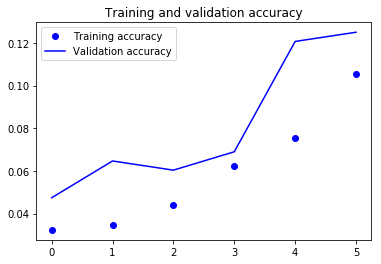

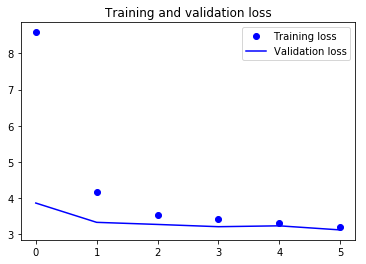

In [20]:
accuracy = sport_train.history['acc']
val_accuracy = sport_train.history['val_acc']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
predicted_classes2 = sport_model.predict(test_X)

In [22]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [23]:
predicted_classes.shape, test_Y.shape

((291,), (291,))

# Aprendamos de los errores: Qué mejorar

Found 36 correct labels


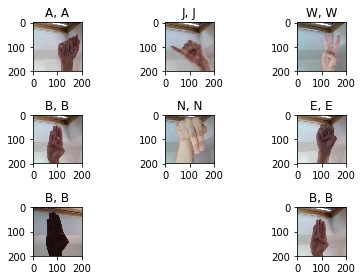

In [24]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(xShape,yShape,zShape), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 255 incorrect labels


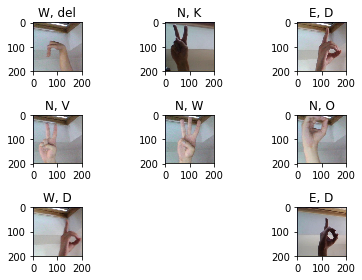

In [25]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(xShape,yShape,zShape), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [27]:
target_names = ["Class {}".format(i) for i in range(len(classes))]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.00      0.00      0.00       562
    Class 1       0.00      0.00      0.00       582
    Class 2       0.00      0.00      0.00       570
    Class 3       0.00      0.00      0.00       611
    Class 4       0.00      0.00      0.00       613
    Class 5       0.00      0.00      0.00       621
    Class 6       0.00      0.00      0.00       621
    Class 7       0.00      0.00      0.00       594
    Class 8       0.00      0.00      0.00       623
    Class 9       0.00      0.00      0.00       590
   Class 10       0.00      0.00      0.00       607
   Class 11       0.00      0.00      0.00       594
   Class 12       0.00      0.00      0.00       602
   Class 13       0.00      0.00      0.00       623
   Class 14       0.03      1.00      0.07       588
   Class 15       0.00      0.00      0.00       618
   Class 16       0.00      0.00      0.00       604
   Class 17       0.00      0.00      0.00   

C:\Users\jasgs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Prediccion de una nueva imagen

In [62]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['..\\asl_alphabet_test\A_test.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (xShape,yShape),clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

..\asl_alphabet_test\A_test.jpg del


C:\Users\jasgs\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
